# &#128204; Epileptic Seizure Model for EEG Signals

### An epileptic seizure is caused by a sudden abnormal, self-sustained electrical discharge that occurs in the cerebral networks and usually lasts for less than a few minutes. Electroencephalography (EEG) is a particularly effective diagnostic tool to study the functional anatomy of the brain during an Epileptic Seizure (ES) attack.



<style>
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron';} 
h2, h3 {color: slategray; font-family: 'Orbitron'; }
h4 {color: #818286; font-family: 'Roboto';}
span {font-family:'Roboto'; color:black; }  
div.output_area pre{font-family:'Roboto'; font-size:110%; color:black;}      
</style>

In [28]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d|ice|');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; } 
h2 {color: purple; font-family: 'Orbitron';}
h3,h4 {color: #818286; font-family: 'Roboto';}
span {font-family:'Roboto'; color:black;}  
div.output_area pre{font-family:'Roboto'; font-size:110%; color:red;}      
</style>

## Importing Libraries

In [29]:
import pandas as pd
#import scipy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
#from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import seaborn as sns
from mlxtend.classifier import EnsembleVoteClassifier,StackingClassifier
import time



pd.set_option('display.max_columns', 100)

## Loading the dataset

### dataset name is **Epileptic Seizure Recognition.csv**

In [30]:

data = pd.read_csv('Epileptic Seizure Recognition.csv')

In [31]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,...,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,...,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,...,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,...,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,...,55,54,38,19,4,-1,10,22,26,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [32]:

data.tail()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,-63,-60,-57,-52,-46,-33,-27,-33,-32,...,-9,-15,-19,-20,-18,-14,0,9,21,34,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,-52,-67,-96,-123,-143,-155,-167,-176,-185,...,52,57,61,60,54,53,55,62,65,68,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,90,76,18,5,10,23,48,32,4,...,-43,-48,-44,-22,-17,18,50,45,-9,-78,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,-56,-77,-105,-110,-103,-89,-80,-81,-98,-113,...,-98,-103,-99,-81,-56,-61,-67,-111,-112,-120,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,23,13,11,-3,-5,-9,-14,1,27,60,69,69,50,33,20,15,4,-5,-4,-8,-15,-13,-2,21,39,48,37,10,-23,-47,-71,-80,-74,-59,-44,-30,-17,-3,6,13,...,49,65,64,44,15,-14,-38,-68,-99,-107,-108,-83,-46,0,30,39,44,33,22,8,-13,-33,-61,-70,-75,-74,-58,-18,19,54,71,76,74,65,56,18,-28,-75,-98,-94,-59,-25,-4,2,5,4,-2,2,20,4


In [33]:
data.shape

(11500, 180)

## Dataset Description

we divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time.<br>

So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

<b>y</b> contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:
 - 5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open
 - 4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed
 - 3 - Yes they identify where the region of the tumor was in the brain
 - 2 - They recorder the EEG from the area where the tumor was located
 - 1 - Recording of seizure activity
All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure.

From the first view we can assume we need to solve **multi-classification task**, but, after accurate exploaring definitions of classes of <b>y</b>, we can realeyes we can *reform* our **multi-classification task** to **binary classification task**.<br>
For that we can just combine {2,3,4,5} classes as 0 class (not epileptic seizure) and keep {1} class as 1 (epileptic seizure).

#  &#128223; Data Pre-processing and EDA

In [34]:
#Before joining the classes, let us check y values for balancing
data['y'].value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

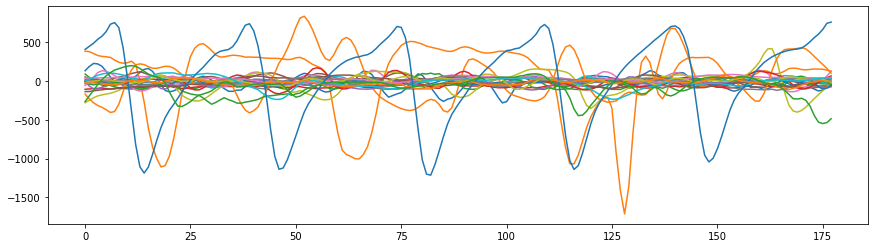

In [35]:

plt.figure(figsize=(50,4))
plt.subplot(131)
[plt.plot(data.values[i][1:-1]) for i in range(23)];

### Changing Y column to Binary Classification

In [36]:
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
data['y'] = data['y'].map(dic)

### "Remove Unnamed" column (it has information which we don't need)

In [37]:
data = data.drop('Unnamed', axis = 1)

In [38]:
data=shuffle(data)

In [39]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,-6.964087,-5.773826,-4.700783,-4.143826,-4.546087,-5.53200,-6.670435,-7.702348,-7.894696,-8.081391,...,-7.629391,-7.373565,-7.439913,-7.592348,-6.897652,-6.000348,-5.423913,-5.151043,-5.586870,-6.281478,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,161.197812,158.045513,157.490904,160.163082,163.996955,167.74431,171.232021,171.484787,169.299229,166.255922,...,158.301750,157.214361,158.679911,160.183325,162.002986,164.260512,166.182755,167.154785,167.414376,168.020316,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,

In [40]:
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(data[data['y'] == 0]), len(data[data['y'] == 1])))

Number of records of Non Epileptic 9200 VS Epilepttic 2300


## Epileptic Vs Non Epileptic

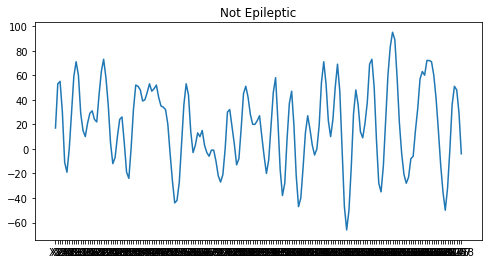

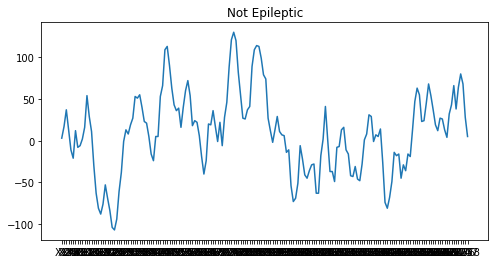

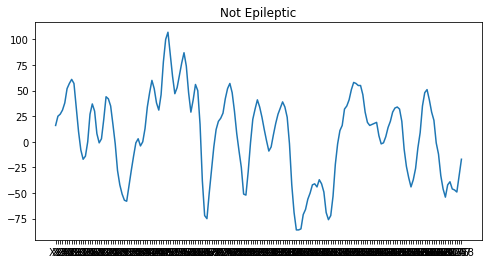

In [41]:
[(plt.figure(figsize=(8,4)), plt.title('Not Epileptic'), plt.plot(data[data['y'] == 0].iloc[i][0:-1])) for i in range(3)];

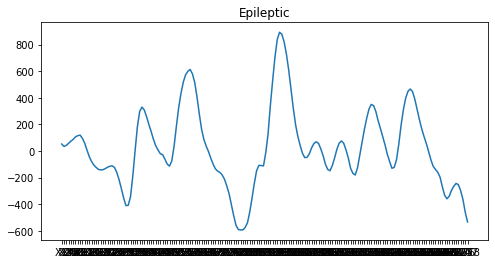

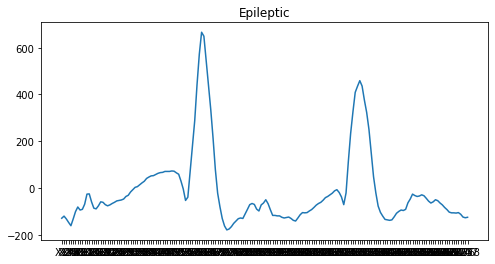

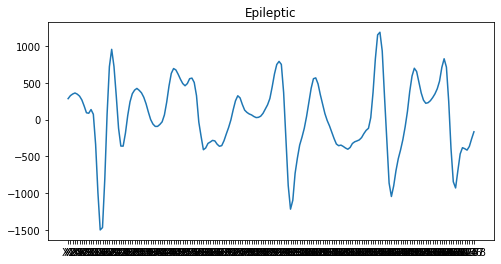

In [42]:
[(plt.figure(figsize=(8,4)), plt.title('Epileptic'), plt.plot(data[data['y'] == 1].iloc[i][0:-1])) for i in range(3)];

# &#128295; Building Machine Learning Models

In [43]:
import imblearn
# define oversampling strategy
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(data.drop('y', axis=1), data['y'])

X.shape, y.shape

((18400, 178), (18400,))

#### Check the balance for y

In [44]:
#Let us group all the Epileptic occureses and Non Epileptic
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(y == True), len(y == False)))

Number of records of Non Epileptic 18400 VS Epilepttic 18400


#### Normalizing

In [45]:
normalized_df = pd.DataFrame(normalize(X))
normalized_df['y'] = y

### Spliting the dataset into test and train

In [46]:


X = normalized_df.drop('y', axis=1)
y = normalized_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

#Check the shapes after splitting
he = X_train, X_test, y_train, y_test
[arr.shape for arr in he]

[(12880, 178), (5520, 178), (12880,), (5520,)]

## Default Models without Params
- LogisticRegression
- Support Vector Machines -
- K-nearest Classifier
- Decision Tree Classifier


In [47]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_log_reg) + ' %')

56.58 %


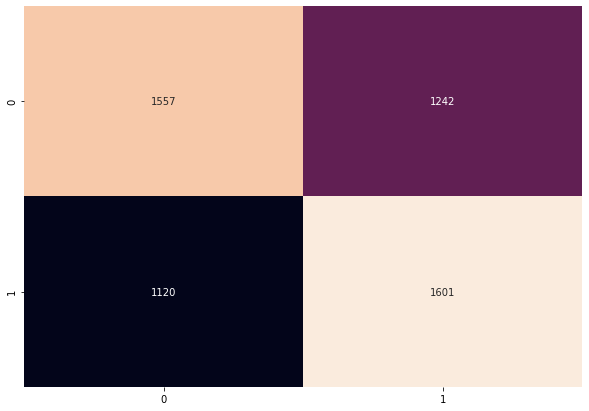

In [23]:
y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False)
plt.show()

In [48]:
import pickle
filename = 'log.pkl'
pickle.dump (clf , open(filename, 'wb'))

In [51]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_svc) + '%')

91.74%


In [52]:
import pickle
filename = 'svc.pkl'
pickle.dump (clf , open(filename, 'wb'))

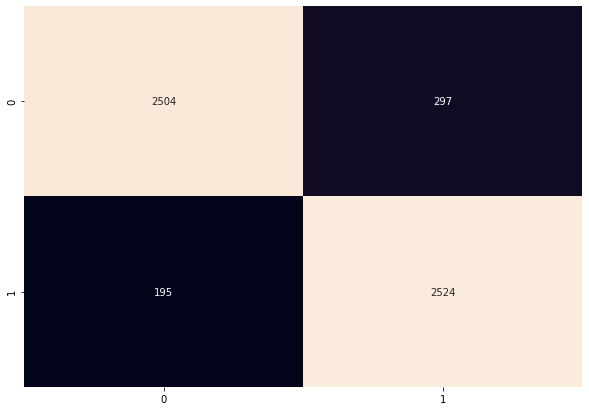

In [24]:
y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False)
plt.show()

In [53]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_knn)+'%')

90.53%


In [54]:
import pickle
filename = 'KNN.pkl'
pickle.dump (clf , open(filename, 'wb'))

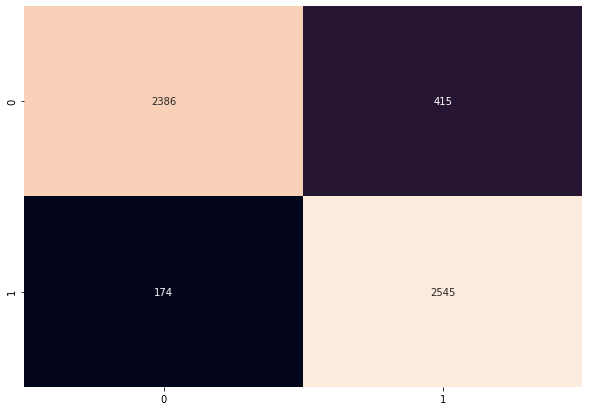

In [26]:
y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False)
plt.show()

In [49]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_test, y_test) * 100, 2)
print (str(acc_knn)+'%')

97.97%


In [50]:
import pickle
filename = 'RF.pkl'
pickle.dump (clf , open(filename, 'wb'))

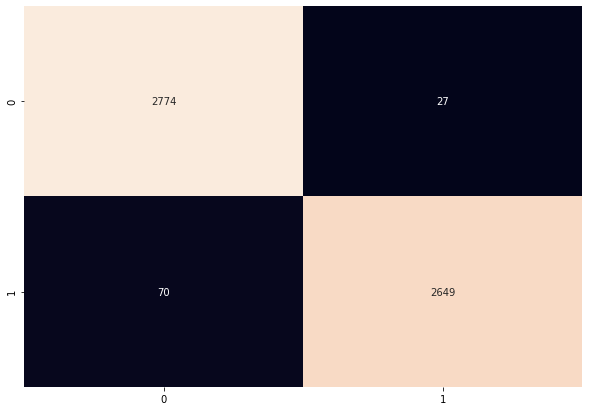

In [28]:
y_pred=clf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False)
plt.show()

# Hybrid Algorithm - 1
![title](Hybrid_meta.png)
##   In this Algorithmic Approach,We have sub classifier and meta classifiers,here also all the sub classifier and meta classifier is trained individually.later,the predictions of the sub classifiers are given to meta classifir as an input.and final prediction is made using Meta classifier.The two algorithms Random Forest and KNN are used as subclassifiers and SVC is used as final meta classifier
                

In [30]:
from mlxtend.classifier import EnsembleVoteClassifier,StackingClassifier


### Training Indiviual Models(sub classifiers) Sepearately


In [31]:
rf=RandomForestClassifier()
clf1=KNeighborsClassifier()
clf2=SVC(probability=True)

### Merging them using Stacking technique

In [33]:
sclf=StackingClassifier(classifiers=[clf1,rf], meta_classifier=clf2)
scores=sclf.fit(X_train,y_train)


In [34]:
sclf.score(X_test,y_test)

0.9836956521739131

In [35]:
from sklearn.metrics import confusion_matrix

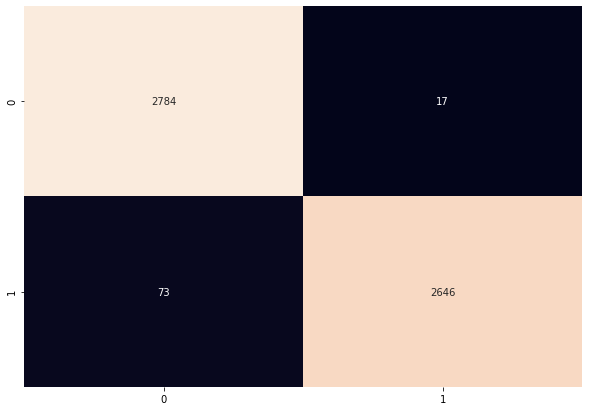

In [36]:
y_pred=sclf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False)
plt.show()

# Hybrid Algorithm - 2
![title](hybrid_2.png)

##  In this Algorithmic Approach,We have used three algorithm which are individually trained and predict their individual predictions.later,these predictions are ensembled using voting technique.i.e. Majority anong the predictions.whichever two algoithms give same output are considered for final prediction.The final prediction is made by considering mjority of three algorithms.
                

### Training Indiviual Models(sub classifiers) Sepearately

In [30]:
rf=RandomForestClassifier()
clf1=KNeighborsClassifier()
clf2=SVC(probability=True)

### Merging them using Ensemble Voting technique

In [31]:
eclf=EnsembleVoteClassifier(clfs=[clf1,clf2,rf],voting='soft')
eclf.fit(X_train,y_train)

EnsembleVoteClassifier(clfs=[KNeighborsClassifier(), SVC(probability=True),
                             RandomForestClassifier()],
                       voting='soft')

In [32]:
eclf.score(X_test,y_test)

0.9514492753623188

###  &#128210; Confusion Matrix

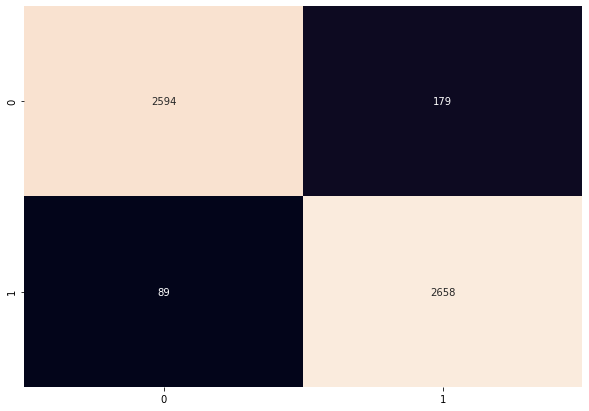

In [33]:
y_pred=eclf.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(cm)
plt.figure(figsize=(10,7))
sns.heatmap(c_df, annot=True, fmt='d',cbar=False)
plt.show()

  # THANK YOU
  
  
  ## Project Credits :-
  
  ### Guidance :- Dr. Veena
  ### Project Research :- Chaitanya M, B E Abhijith
  ### Project Analysis :- Achutha Sandesh,Adarsh Sadanand Shetty
  ### EDA :- Chaitanya M,Achutha Sandesh
  ### Hybrid Modeling,Data Processing :- B E Abhijith
  ### Streamlit FrontEnd :- Adarsh Sadanand Shetty